In [1]:
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from itertools import product
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression, Ridge
import logomaker

#from Bio.Seq import Seq
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from seqtools import *

font = {'family' : 'sans-serif',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

ALL_AAS = ("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")

In [2]:
def plot_logo(batch, acquisition):
  dfs = []
  for i in range(1, 6):
      temp = batch.groupby(f'AA{i}').count()
      temp[i] = temp.mean(axis=1)
      temp = temp[[i]]
      temp.index.name = ''
      temp = temp.copy().T
      dfs.append(temp)
  
  df = pd.concat(dfs)
  #replace nan with 0
  df = df.fillna(0)
  #normalize rows to 1
  df = df.div(df.sum(axis=1), axis=0)
  df

  # create Logo object
  AAs_logo = logomaker.Logo(df,
                            color_scheme='weblogo_protein',
                            #font_name='Arial',
                            vpad=.15,
                            figsize=(3, 2.5),
                          #   baseline_width=.8,
  )

  # additional styling using Logo methods
  AAs_logo.style_spines(visible=False)

  # style using Axes methods
  AAs_logo.ax.set_ylim([0, 1])
  #AAs_logo.ax.set_ylabel('frequency', labelpad=0)
  #AAs_logo.ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  AAs_logo.ax.set_yticks([])
  AAs_logo.ax.set_xticks([1,2,3,4, 5])
  AAs_logo.ax.set_xticklabels([56, 57,59,60, 89])
  #AAs_logo.ax.set_title(acquisition)

  return

In [5]:
df = pd.read_csv('../ParPgb_fitness_all.csv')
df['selectivity'] = df['yield1']/df['yield2']
df['total_yield'] = df['yield1'] + df['yield2']
df['yield_diff'] = df['yield1'] - df['yield2']
df.sort_values(by='yield_diff', ascending=False)

,Combo,NormIso1,NormIso2,PlateNormIso1,PlateNormIso2,Diff,round,yield1,yield2,selectivity,total_yield,yield_diff
306,MPFDY,10.180141,0.805376,7.494145,0.589870,6.904275,round2,92.656383,6.605867,14.026378,99.262250,86.050516
307,MGFDY,9.195301,0.542126,6.632599,0.394564,6.238035,round2,83.627237,4.148184,20.159964,87.775421,79.479053
216,MKFNY,9.432613,0.856375,4.931448,0.446740,4.484708,round1,85.802944,7.081989,12.115657,92.884932,78.720955
309,HKFNY,8.940092,0.819603,6.571582,0.602854,5.968727,round2,81.287443,6.738681,12.062812,88.026124,74.548762
308,FKMDY,9.531129,1.417157,7.092939,1.043002,6.049937,round2,86.706154,12.317392,7.039328,99.023546,74.388763
...,...,...,...,...,...,...,...,...,...,...,...,...
208,VCRAS,0.399202,6.816367,0.276099,4.714394,-4.438295,initial,2.983329,62.723912,0.047563,65.707240,-59.740583
210,HDNMN,0.295409,6.742515,0.205416,4.688478,-4.483062,initial,2.031745,62.034434,0.032752,64.066178,-60.002689
213,PCLTD,0.173913,6.942688,0.120283,4.801761,-4.681477,initial,0.917851,63.903228,0.014363,64.821079,-62.985377
209,ACSEK,0.495918,7.304082,0.323972,4.771593,-4.447621,initial,3.870042,67.277167,0.057524,71.147209,-63.407125


In [7]:
df[df['round'] == 'parent']

,Combo,NormIso1,NormIso2,PlateNormIso1,PlateNormIso2,Diff,round,yield1,yield2,selectivity,total_yield,yield_diff
78,WYLQF,1.386954,4.382704,1.0,3.149412,-2.149412,parent,12.039188,40.003456,0.300954,52.042644,-27.964268


### Yields, normalized to the internal standard, and converted based on the calibration curve

Text(24.472222222222214, 0.5, 'Trans Yield (%)')

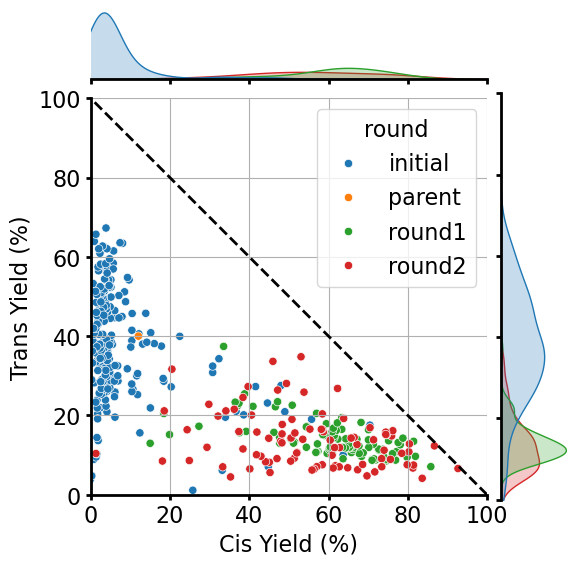

In [8]:
sns.jointplot(data=df, x='yield1', y='yield2', hue='round')
              
plt.plot([100, 0], [0, 100], 'k--')
#plt.plot(df[df['Combo'] == 'WYLQF']['yield1'], df[df['Combo'] == 'WYLQF']['yield2'], 'rs', markersize=8, label='Parent')
ax = plt.gca()

ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Cis Yield (%)')
plt.ylabel('Trans Yield (%)')

### Product formation, normalized to parents on each plate

Text(24.472222222222214, 0.5, 'Trans Formation')

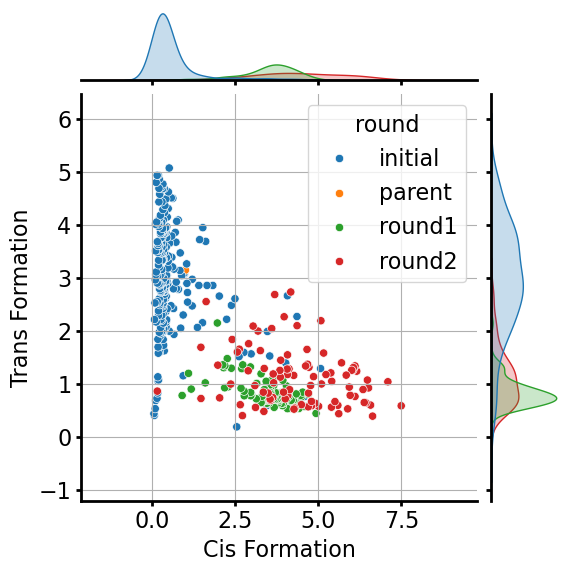

In [9]:
sns.jointplot(data=df, x='PlateNormIso1', y='PlateNormIso2', hue='round')
              
#plt.plot([100, 0], [0, 100], 'k--')
#plt.plot(df[df['Combo'] == 'WYLQF']['yield1'], df[df['Combo'] == 'WYLQF']['yield2'], 'rs', markersize=8, label='Parent')
plt.grid()
plt.xlabel('Cis Formation')
plt.ylabel('Trans Formation')

/tmp/ipykernel_222826/4164201401.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_meaan = df.groupby('round').mean().reset_index()


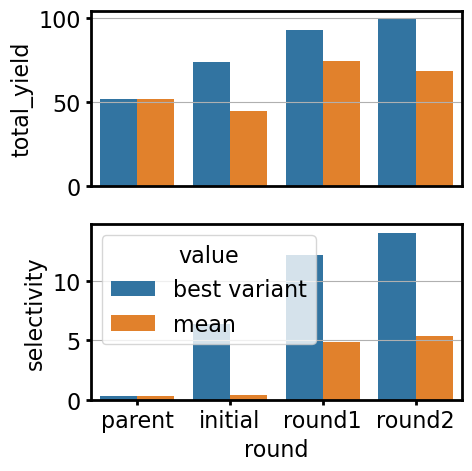

In [10]:
#only track the variant with the highest yield difference
df_best = df.loc[df.groupby('round')['yield_diff'].idxmax()]
df_best = df_best.sort_values(by='round')
df_best['value'] = 'best variant'

df_meaan = df.groupby('round').mean().reset_index()
df_meaan['value'] = 'mean'
df_summary = pd.concat([df_best, df_meaan])

plt.figure(figsize=(5, 5))
plt.subplot(2,1,1)
sns.barplot(data=df_summary, x='round', y='total_yield', hue='value', order = ['parent', 'initial', 'round1', 'round2'], legend=False)
plt.grid(axis='y')
plt.xlabel('')
plt.xticks([])

plt.subplot(2,1,2)
sns.barplot(data=df_summary, x='round', y='selectivity', hue='value', order = ['parent', 'initial', 'round1', 'round2'])
plt.grid(axis='y')
plt.tight_layout()

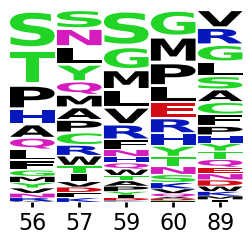

In [11]:
df
for l in range(5):
    df['AA' + str(l+1)] = df['Combo'].apply(lambda x: x[l])
plot_logo(df[df['round'] == 'initial'], 'Initial')

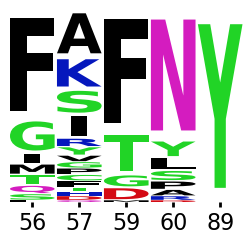

In [12]:
plot_logo(df[df['round'] == 'round1'], 'Round1')

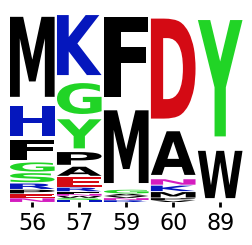

In [13]:
plot_logo(df[df['round'] == 'round2'], 'Round2')

### Look at how the variants were explored using tSNE

<Axes: xlabel='x', ylabel='y'>

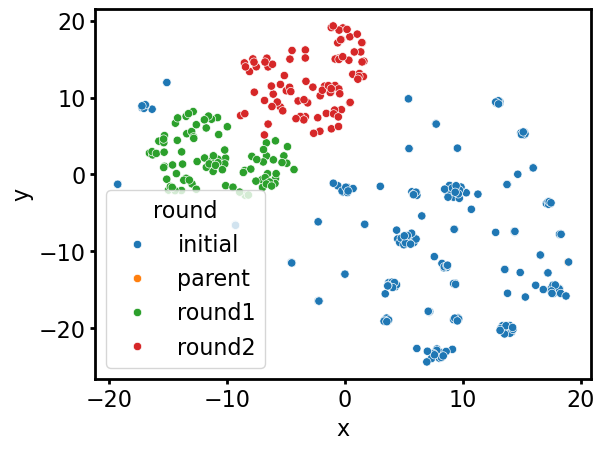

In [14]:
#onehot encode the variants
from src.encoding_utils import generate_onehot

#import tSNE
embeddings = generate_onehot(df['Combo'].values).reshape(-1, 100)

np.random.seed(42)
tsne = TSNE(n_components=2)
tsne.fit(embeddings)

df['x'] = tsne.embedding_[:, 0]
df['y'] = tsne.embedding_[:, 1]

#this is not the most interesting plot, would also probably not be that interesting even if I included all the variants
sns.scatterplot(data=df, x='x', y='y', hue='round')

### Look at the singles

In [7]:
#from ravi's benchling calibration curve
def normiso1toyield(x):
    return (x - 0.0738)/1.6361 * 10 * 1.5

def normiso2toyield(x):
    return (x - 0.0978)/1.6067 * 10 * 1.5

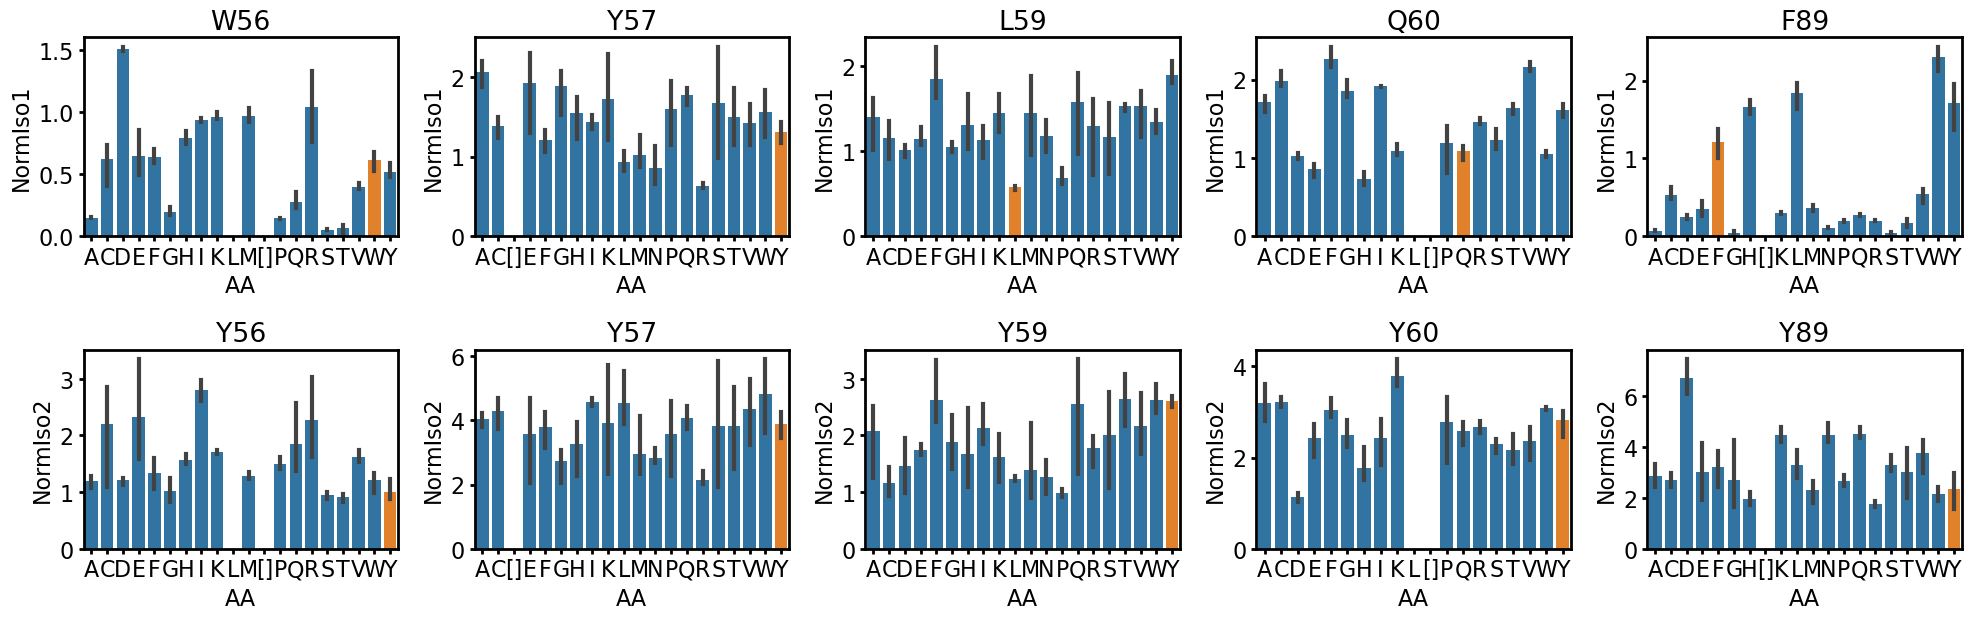

In [15]:
parent_residues = ['W', 'Y', 'L', 'Q', 'F']
number = ['56', '57', '59', '60', '89']
i = 0
plt.figure(figsize=(20, 9))
map_dict = {}
#make an empty nested dictionary

combos = []
NormIso1 = []
NormIso2 = []

for column in ['NormIso1', 'NormIso2']: #['NormIso1', 'NormIso2', 'Diff']
    map_dict[column] = {}
    for sheet, residue in zip(range(5), parent_residues):
        map_dict[column][sheet] = {}
        plt.subplot(3, 5, i+1)
        i += 1
        data = pd.read_excel('initial/RL-7-50_SSM_AllData_56X-60X+89X.xlsx', sheet_name=sheet) 
        #replace Sterile with []
        data['AA'] = data['AA'].apply(lambda x: x.replace('Sterile', '[]'))
        data['WT'] = data['AA'] == residue
        
        #normalize everything to mean of WT
        #data[column] = data[column]/data[data['WT']][column].mean()

        #barplot with the resude of interest colored
        plt.title(residue + number[sheet])
        

        #data['Diff'] = data['NormIso1'] - data['NormIso2']
        sns.barplot(x='AA', y=column, data=data, hue ='WT')
        
        for aa in ALL_AAS:
            mean = data[data['AA'] == aa][column].mean()
            # if np.isnan(mean):
            #     mean = 1
            map_dict[column][sheet][aa] = mean

            residues = parent_residues
            residues[sheet] = aa
            combo = ''.join(residues)
            
            if column == 'NormIso1':
                combos.append(combo)
                NormIso1.append(mean)
            else:
                NormIso2.append(mean)
                

        #remove legend
        #plt.ylim(0, 3.5)
        
        
        plt.legend([],[], frameon=False)

dict = {'Combo': combos, 'NormIso1': NormIso1, 'NormIso2': NormIso2,}
singles_df = pd.DataFrame(dict)
plt.tight_layout()

In [16]:
df = pd.read_excel('/disk1/jyang4/repos/ALDE/analysis/ParPgb/initial/RL-7-55_recombination.xls')
df['yield1'] = df['NormIso1'].apply(normiso1toyield)
df['yield2'] = df['NormIso2'].apply(normiso2toyield)
df['selectivity'] = df['yield1']/df['yield2']
df['total_yield'] = df['yield1'] + df['yield2']

#remove last two charaacters from sample name
df['Sample'] = df['Sample'].apply(lambda x: x[:-2])
#replace ParLQ in sample with WYLQF
df['Sample'] = df['Sample'].apply(lambda x: x.replace('ParLQ', 'WYLQF'))
df['Parent'] = df['Sample'] == 'WYLQF'
df['Cis Yield (%)'] = df['yield1']
df['Cis - Trans Yield (%)'] = df['yield1'] - df['yield2']
df['Cis/Trans Selectivity'] = df['selectivity']
df

,Sample,StdArea,Iso1Area,Iso2Area,NormIso1,NormIso2,yield1,yield2,selectivity,total_yield,Parent,Cis Yield (%),Cis - Trans Yield (%),Cis/Trans Selectivity
0,WYLQF,472,740,2556,1.567797,5.415254,13.697176,49.643252,0.275912,63.340428,True,13.697176,-35.946077,0.275912
1,WYLQF,476,810,2735,1.701681,5.745798,14.924644,52.729181,0.283043,67.653825,True,14.924644,-37.804537,0.283043
2,WYLQF,477,724,2515,1.517820,5.272537,13.238980,48.310855,0.274037,61.549835,True,13.238980,-35.071874,0.274037
3,DAYFW,470,1693,1427,3.602128,3.036170,32.348215,27.432348,1.179200,59.780563,False,32.348215,4.915867,1.179200
4,DAYFW,477,1231,998,2.580713,2.092243,22.983737,18.619934,1.234362,41.603671,False,22.983737,4.363803,1.234362
5,DAYFW,470,1855,1597,3.946809,3.397872,35.508299,30.809165,1.152524,66.317464,False,35.508299,4.699134,1.152524
6,DGMDW,477,1229,1018,2.576520,2.134172,22.945296,19.011376,1.206924,41.956672,False,22.945296,3.933919,1.206924
7,DGMDW,462,1386,1145,3.000000,2.478355,26.827822,22.224637,1.207121,49.052460,False,26.827822,4.603185,1.207121
8,DGMDW,461,1431,1200,3.104121,2.603037,27.782423,23.388656,1.187859,51.171079,False,27.782423,4.393767,1.187859
9,DHMVW,475,2587,1446,5.446316,3.044211,49.255997,27.507411,1.790645,76.763408,False,49.255997,21.748586,1.790645


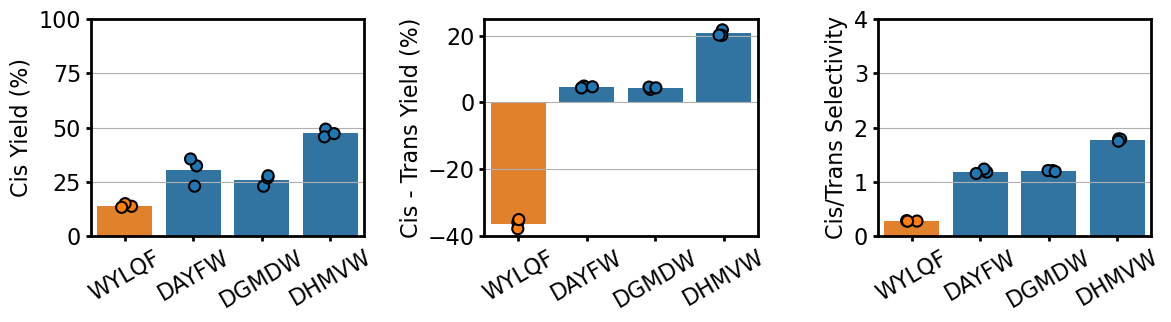

In [48]:
plt.figure(figsize=(12, 3.5))
for i, column in enumerate(['Cis Yield (%)', 'Cis - Trans Yield (%)', 'Cis/Trans Selectivity']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Sample', y=column, data=df, hue ='Parent', errorbar=None, legend=False)
    sns.stripplot(x='Sample', y=column, data=df, hue ='Parent', size=8, edgecolor='black', linewidth=1.5, legend=False)
    plt.xticks(rotation=30)
    plt.xlabel('')
    #horizontal gridlines
    plt.grid(axis='y')
    if i == 0:
        plt.ylim(0, 100)
    elif i == 1:
        plt.ylim(-40, 25)
    elif i == 2:
        plt.ylim(0, 4)
plt.tight_layout()
plt.savefig('figs/recombination.jpg', dpi=500)

### Stuff below is more for the SI

In [16]:
fitness_df = df

In [17]:
def recomb_value(combo):
    total_fit = 1
    for i, letter in enumerate(combo):
        fit = map_dict[fit_column][i][letter] 
        total_fit *= fit
    return total_fit

In [18]:
fit_column = 'NormIso1'
fitness_df['NormIso1_recomb'] = fitness_df['Combo'].apply(recomb_value)
fit_column = 'NormIso2'
fitness_df['NormIso2_recomb'] = fitness_df['Combo'].apply(recomb_value)
fitness_df

,Combo,NormIso1,NormIso2,PlateNormIso1,PlateNormIso2,Diff,round,yield1,yield2,selectivity,...,yield_diff,AA1,AA2,AA3,AA4,AA5,x,y,NormIso1_recomb,NormIso2_recomb
0,FRMNY,7.020661,1.171488,4.586441,0.765307,3.821134,initial,63.689822,10.023846,6.353831,...,53.665975,F,R,M,N,Y,-16.343565,8.482049,NaN,NaN
1,SAFRY,7.757700,1.977413,5.067932,1.291800,3.776133,initial,70.447102,17.547888,4.014563,...,52.899214,S,A,F,R,Y,-0.601136,-1.472399,0.513740,64.103529
2,GIDLY,4.960080,0.854291,3.449043,0.594040,2.855002,initial,44.798116,7.062533,6.343067,...,37.735583,G,I,D,L,Y,-9.298587,-6.515139,0.000000,0.000000
3,TSGMY,6.152918,2.136821,4.019563,1.395937,2.623626,initial,55.734223,19.036107,2.927816,...,36.698116,T,S,G,M,Y,4.477463,-8.381591,NaN,NaN
4,TNMPY,3.694215,0.758264,3.260248,0.669190,2.591058,initial,33.192484,6.166034,5.383117,...,27.026450,T,N,M,P,Y,8.873133,-1.430054,0.161708,23.890889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,MYFAW,2.728117,1.853367,1.975724,1.355883,0.619842,round2,24.335155,16.389812,1.484773,...,7.945344,M,Y,F,A,W,-0.349017,17.511501,9.203651,90.425220
392,MEMDW,3.325736,2.541647,2.408365,1.840167,0.568198,round2,29.814219,22.815524,1.306751,...,6.998695,M,E,M,D,W,1.193942,12.720356,6.382839,15.518319
393,MYMDW,2.098371,2.363978,1.466306,1.693301,-0.226994,round2,18.561559,21.156829,0.877332,...,-2.595270,M,Y,M,D,W,1.100341,12.381139,4.326656,16.959718
394,GPFAW,0.218307,1.211705,0.154663,0.866176,-0.711513,round2,1.324859,10.399309,0.127399,...,-9.074450,G,P,F,A,W,-0.989586,19.303595,2.323819,65.074326


In [19]:
fitness_df['NormIso1_recomb_rank'] = fitness_df['NormIso1_recomb'].rank(ascending = False)
fitness_df['NormIso2_recomb_rank'] = fitness_df['NormIso2_recomb'].rank(ascending = False)

In [24]:
fitness_df

,Combo,NormIso1,NormIso2,PlateNormIso1,PlateNormIso2,Diff,round,yield1,yield2,selectivity,...,AA2,AA3,AA4,AA5,x,y,NormIso1_recomb,NormIso2_recomb,NormIso1_recomb_rank,NormIso2_recomb_rank
0,FRMNY,7.020661,1.171488,4.586441,0.765307,3.821134,initial,63.689822,10.023846,6.353831,...,R,M,N,Y,-16.343565,8.482049,NaN,NaN,NaN,NaN
1,SAFRY,7.757700,1.977413,5.067932,1.291800,3.776133,initial,70.447102,17.547888,4.014563,...,A,F,R,Y,-0.601136,-1.472399,0.513740,64.103529,119.0,106.0
2,GIDLY,4.960080,0.854291,3.449043,0.594040,2.855002,initial,44.798116,7.062533,6.343067,...,I,D,L,Y,-9.298587,-6.515139,0.000000,0.000000,263.5,263.5
3,TSGMY,6.152918,2.136821,4.019563,1.395937,2.623626,initial,55.734223,19.036107,2.927816,...,S,G,M,Y,4.477463,-8.381591,NaN,NaN,NaN,NaN
4,TNMPY,3.694215,0.758264,3.260248,0.669190,2.591058,initial,33.192484,6.166034,5.383117,...,N,M,P,Y,8.873133,-1.430054,0.161708,23.890889,157.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,MYFAW,2.728117,1.853367,1.975724,1.355883,0.619842,round2,24.335155,16.389812,1.484773,...,Y,F,A,W,-0.349017,17.511501,9.203651,90.425220,9.0,57.0
392,MEMDW,3.325736,2.541647,2.408365,1.840167,0.568198,round2,29.814219,22.815524,1.306751,...,E,M,D,W,1.193942,12.720356,6.382839,15.518319,24.0,237.0
393,MYMDW,2.098371,2.363978,1.466306,1.693301,-0.226994,round2,18.561559,21.156829,0.877332,...,Y,M,D,W,1.100341,12.381139,4.326656,16.959718,58.0,235.0
394,GPFAW,0.218307,1.211705,0.154663,0.866176,-0.711513,round2,1.324859,10.399309,0.127399,...,P,F,A,W,-0.989586,19.303595,2.323819,65.074326,90.0,102.0


In [31]:
ZS_df = pd.read_csv('initial/processed_withZS.csv')[['Combo', 'EVMutation Rank', 'Triad Rank']]
merged = pd.merge(fitness_df, ZS_df, on='Combo', how='inner')
merged

,Combo,NormIso1,NormIso2,PlateNormIso1,PlateNormIso2,Diff,round,yield1,yield2,selectivity,...,AA4,AA5,x,y,NormIso1_recomb,NormIso2_recomb,NormIso1_recomb_rank,NormIso2_recomb_rank,EVMutation Rank,Triad Rank
0,FRMNY,7.020661,1.171488,4.586441,0.765307,3.821134,initial,63.689822,10.023846,6.353831,...,N,Y,-16.343565,8.482049,NaN,NaN,NaN,NaN,69.0,33
1,SAFRY,7.757700,1.977413,5.067932,1.291800,3.776133,initial,70.447102,17.547888,4.014563,...,R,Y,-0.601136,-1.472399,0.513740,64.103529,119.0,106.0,118.0,48
2,GIDLY,4.960080,0.854291,3.449043,0.594040,2.855002,initial,44.798116,7.062533,6.343067,...,L,Y,-9.298587,-6.515139,0.000000,0.000000,263.5,263.5,112.0,97
3,TSGMY,6.152918,2.136821,4.019563,1.395937,2.623626,initial,55.734223,19.036107,2.927816,...,M,Y,4.477463,-8.381591,NaN,NaN,NaN,NaN,90.0,60
4,TNMPY,3.694215,0.758264,3.260248,0.669190,2.591058,initial,33.192484,6.166034,5.383117,...,P,Y,8.873133,-1.430054,0.161708,23.890889,157.0,207.0,146.0,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,LQSGA,0.582278,5.748945,0.513877,5.073604,-4.559727,initial,4.661804,52.758559,0.088361,...,G,A,13.160709,-20.265261,0.000000,0.000000,263.5,263.5,130.0,84
212,QYKGD,0.242081,5.511312,0.213644,4.863887,-4.650243,initial,1.542829,50.540041,0.030527,...,G,D,18.748642,-15.798528,0.240125,194.278871,140.0,2.0,80.0,113
213,PCLTD,0.173913,6.942688,0.120283,4.801761,-4.681477,initial,0.917851,63.903228,0.014363,...,T,D,9.384983,-14.281133,0.046277,113.347194,192.0,21.0,216.0,187
214,NNVER,0.208251,5.593320,0.183788,4.936261,-4.752473,initial,1.232670,51.305660,0.024026,...,E,R,13.747065,-1.309763,NaN,NaN,NaN,NaN,176.0,120


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

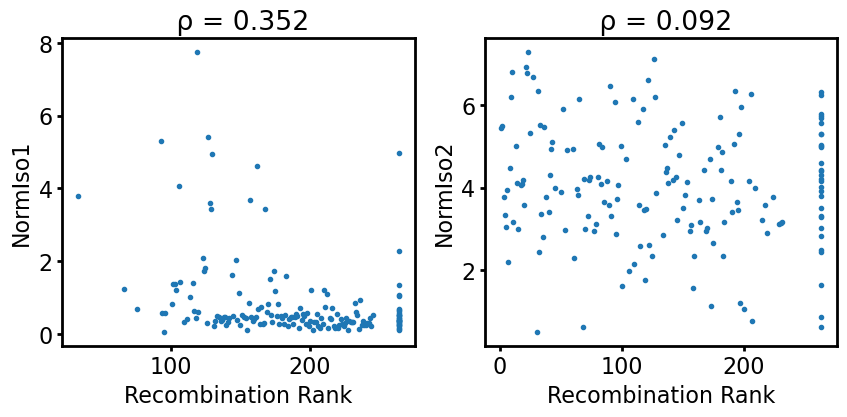

In [43]:
plt.figure(figsize=(10, 4))
for i, column in enumerate(['NormIso1', 'NormIso2']):
    plt.subplot(1, 2, i+1)
    fitness_df2 = merged.dropna(subset=[column+ '_recomb_rank'])
    plt.plot(fitness_df2[column+ '_recomb_rank'], fitness_df2[column], '.')
    spearman_value = spearmanr(-fitness_df2[column +'_recomb_rank'].values, fitness_df2[column].values)[0]
    plt.title(' \u03C1 = ' + str(round(spearman_value,3)))
    plt.xlabel('Recombination Rank')
    plt.ylabel(column)
plt.tight_layout

Generally the cis isomer activity is correlated to the singles, but the best one is not obvious

### Look at correlations to ZS scores

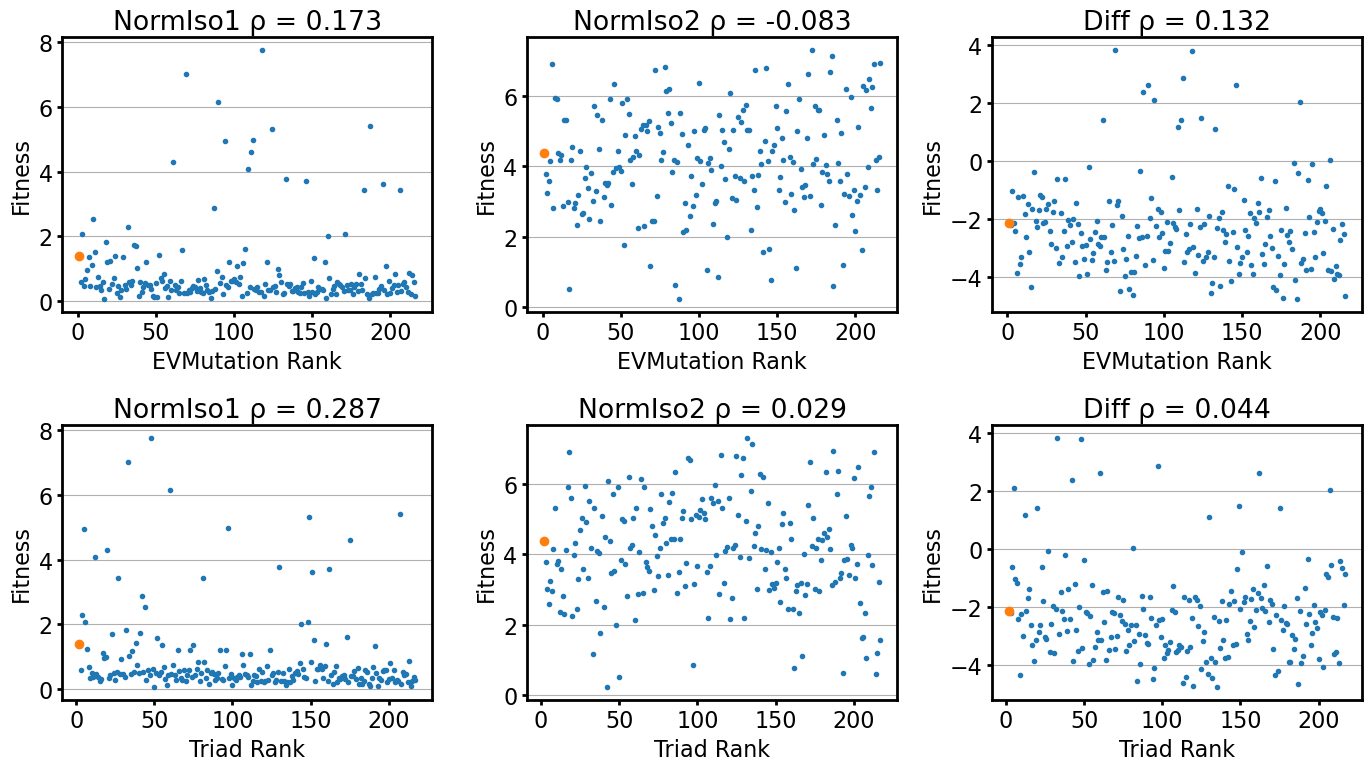

In [33]:
plt.figure(figsize=(14, 8))
for i,zs in enumerate(['EVMutation Rank', 'Triad Rank']):
    for j, reaction in enumerate(['NormIso1', 'NormIso2', 'Diff']):

        # fitness = merged[reaction]
        # fitness[fitness == np.inf] = np.min(fitness)
        # merged['norm_fit'] = fitness/np.nanmax(fitness)

        #zs = 'Triad Rank'
        
        #zs = 'Naive Rank'
        #merged['Naive Rank'] = merged['indep_fit'].rank(ascending = False)

        WT_combo = 'WYLQF'

        WT_df = merged[merged['Combo'] == WT_combo]

        plt.subplot(2,3, 3*i + j+1)
        plt.plot(merged[zs], merged[reaction], '.')
        plt.plot(WT_df[zs], WT_df[reaction], 'o')
        plt.title( reaction + ' \u03C1 = ' + str(round(spearmanr(-merged[zs].values, merged[reaction].values)[0],3)))
        plt.grid(axis='y')
        #plt.xlim(0, 96)
        plt.xlabel(zs)
        plt.ylabel('Fitness')
plt.tight_layout()

SignificanceResult(statistic=0.5524428726229175, pvalue=1.1720170803151053e-18)

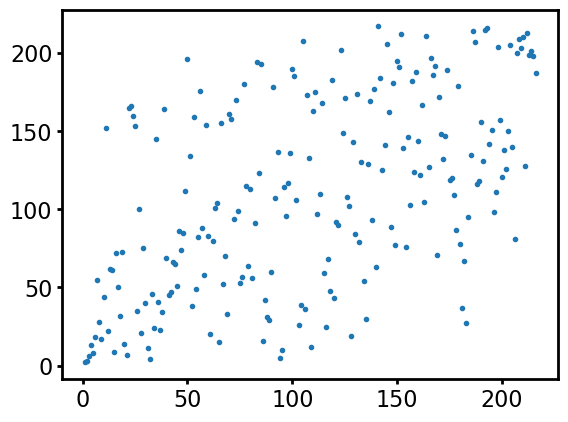

In [34]:
plt.plot(merged['EVMutation Rank'], merged['Triad Rank'], '.')
spearmanr(merged['EVMutation Rank'].values, merged['Triad Rank'].values)